* **GP**-Games Played    **MIN**-Minutes Played    **FG%**-Field Goal Percentage    **FGM**-Field Goals Made
* **FGA**-Field Goals Attempted    **3P%**-3 Point Field Goals Percentage    **3PM**-3 Point Field Goals Made
* **3PA**-3 Point Field Goals Attempted    **FT%**-Free Throw Percentage    **FTM**-Free Throws Made
* **FTA**-Free Throws Attempted **REB**-Rebounds **OREB**-Offensive Rebounds **DREB**-Defensive Rebounds
* **AST**-Assists **STL**-Steals **BLK**-Blocks **TOV**-Turnovers **PF**-Personal Fouls **PTS**-Points
* **PER**-efficiency value **WS**-Win Shares

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv("04-12_NBA_rookies_data.csv", header=None)

In [5]:
#load dataset
df1 = pd.read_csv("04-12_NBA_rookies_data_without3PP.csv", header=None, encoding='utf-8')
#df1 = df1.astype(float)
ds = df1.values
x = ds[:,0:23]

#  PCA analysis

In [6]:
def zeroMean(dataMat):        
    meanVal=np.mean(dataMat,axis=0)     #get mean by columns
    newData=dataMat-meanVal  
    return newData,meanVal


def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)          #ascend order 
    sortArray=sortArray[-1::-1]           
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num  


def pca(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage)                 #need n dimensionol data to get the convariance percentage
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat,n 

# PCA processing

In [7]:
lowDDataMat,reconMat,n = pca(x)
print('auto choose '+str(n)+' dimentional')
lowDDataMat

auto choose 5 dimentional


matrix([[ 66.98303368, -32.80212741, -15.43392667,   7.5355039 ,
          -2.23328347],
        [ 48.94320987,  -5.03255543, -11.6712219 ,   1.10170476,
           4.22327956],
        [ 29.28591998,  18.11223535,  -5.3553855 ,   3.80480391,
           0.69330913],
        ...,
        [-52.32370277, -14.23029569,  -2.44296531,  -6.16752451,
           5.0028104 ],
        [-46.42545777,  -8.67923521,  -3.30853984, -11.48551298,
           7.75618201],
        [-49.96009269, -11.45113396,  -4.59694688,  -6.95903878,
           3.82868821]])

In [8]:
df2 = pd.read_csv("prediction_data.csv", header=None, encoding='utf-8')
#df1 = df1.astype(float)
ds1 = df2.values
x1 = ds1[:,0:23]
lowDDataMat3,reconMat3,n3 = pca(x1)
print('auto choose '+str(n3)+' dimentional')
lowDDataMat3

auto choose 5 dimentional


matrix([[ 7.63409103e+01, -4.05386792e+01,  9.39633821e+00,
          7.56420792e+00,  1.98314752e+00],
        [ 3.12176168e+01, -3.53570327e+01, -1.26991325e+01,
          4.86555926e+00,  8.43084221e+00],
        [ 5.93074214e+01, -3.53310366e+01,  1.19507559e+01,
          2.97419505e+00,  1.98037686e+00],
        [ 5.49939488e+01, -2.07840565e+01, -9.43292819e+00,
         -2.14681061e+00,  1.18639701e+00],
        [ 5.87431252e+01, -1.87599023e+01, -1.74010095e+01,
         -1.22384840e+00, -2.59700130e-01],
        [ 5.19488039e+01, -3.06635954e+01,  1.35120363e+01,
         -3.50413420e+00,  7.04799662e+00],
        [ 2.41468557e+01, -3.75634476e+00,  9.66137206e+00,
          5.65830093e+00,  5.46556035e+00],
        [ 2.67566414e+01,  2.28724908e+01, -2.83440481e+00,
          1.49306143e+00,  7.00721574e+00],
        [ 3.22756314e+01,  3.30560310e+01,  3.29224114e+00,
          5.77564759e+00,  4.09522715e+00],
        [ 1.36048954e+01,  1.65217138e+01, -5.31745125e+00,
    

# Keras application

In [10]:
from keras.layers import *
from keras.models import Sequential, Model

In [74]:
#load dataset
#df = pandas.read_csv("04-12_NBA_rookies_data_without3PP.csv", header=None)
df1 = pd.read_csv("04-12_NBA_rookies_label.csv",header=None)
#df_test = pandas.read_csv("prediction_data.csv",header=None)
df1_test = pd.read_csv("rookies_name.csv",header=None)
#ds = df.values
ds1 = df1.values
#ds_test = df_test.values
ds1_test = df1_test.values
x_train = lowDDataMat[:,0:5]
y_train = ds1[:,1]
x_test = lowDDataMat3[:,0:5]
y_test = ds1_test[:,0]

dim = x_train.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.2,epochs=120,shuffle=True, batch_size = 16)
dnn_predict = model.predict_classes(x_test)
print(sum(dnn_predict))
print(y_test[dnn_predict == 1])

Train on 291 samples, validate on 73 samples
Epoch 1/120
291/291 [==============================] - 1s 3ms/step - loss: 1.6414 - acc: 0.7251 - val_loss: 1.4842 - val_acc: 0.8219
Epoch 2/120
291/291 [==============================] - 0s 134us/step - loss: 1.1622 - acc: 0.8041 - val_loss: 1.2837 - val_acc: 0.8493
Epoch 3/120
291/291 [==============================] - 0s 134us/step - loss: 0.9038 - acc: 0.8591 - val_loss: 0.9919 - val_acc: 0.8630
Epoch 4/120
291/291 [==============================] - 0s 126us/step - loss: 0.9502 - acc: 0.8488 - val_loss: 0.9137 - val_acc: 0.8630
Epoch 5/120
291/291 [==============================] - 0s 133us/step - loss: 1.0547 - acc: 0.8385 - val_loss: 0.9505 - val_acc: 0.8630
Epoch 6/120
291/291 [==============================] - 0s 138us/step - loss: 0.9210 - acc: 0.8419 - val_loss: 0.9728 - val_acc: 0.8630
Epoch 7/120
291/291 [==============================] - 0s 114us/step - loss: 1.0990 - acc: 0.8763 - val_loss: 1.0976 - val_acc: 0.8630
Epoch 8/120


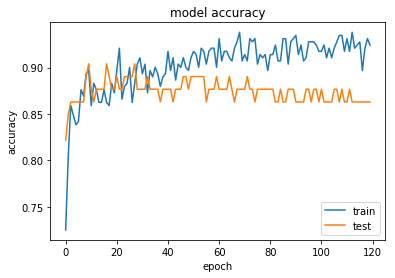

In [75]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()


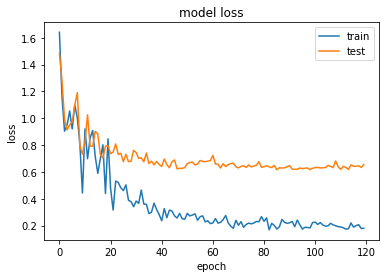

In [76]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()